<a href="https://colab.research.google.com/github/Chanito/mlbourbaki/blob/main/notebooks/regresi%C3%B3n%2C_ruido_y_series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.arima_process import ArmaProcess          # para simular proceso ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  

import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def genera_puntos_regresion(m, b, sigma, size=10):
    '''genera coordenadas en x y y de puntos aleatorios
    en regresión.
    m: pendiente
    b: ordenada al origen
    sigma: desviación estándar de errores gaussianos
    size: cantidad de puntos a generar'''
    
    errors = 0
    xdata = np.linspace(-1.0,1.0,size)
    errors = np.random.normal(0, sigma, size) 
    ydata = m * xdata + b + errors

    return xdata, ydata

# Simulación de puntos en 2d a partir de la ecuación de una recta

## Sin Ruido 

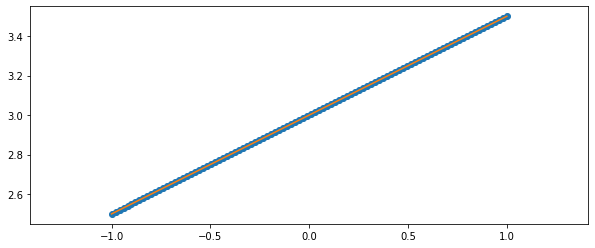

In [10]:
m = 0.5
b = 3
sigma = 0

xs, ys = genera_puntos_regresion(m, b, sigma, size=100)

fig = plt.figure(figsize = (10, 4))
plt.plot(xs, ys, 'o')
plt.plot(xs, m * xs + b)

plt.axis('equal')
plt.show()

## Con Ruido

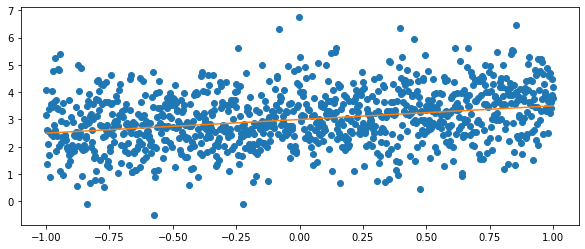

In [12]:
m = 0.5
b = 3
sigma = 1

fig = plt.figure(figsize = (10, 4))
xs, ys = genera_puntos_regresion(m, b, sigma, size=1000)

plt.plot(xs, ys, 'o')
plt.plot(xs, m * xs + b)
plt.show()

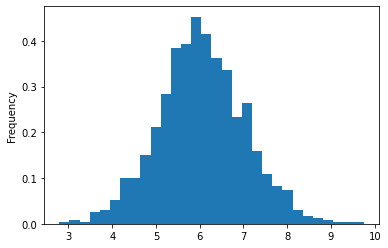

In [13]:
errores = ys -  m * xs + b 
pd.Series(errores).plot.hist(bins=30, density = True)

# Simulación de Ruido blanco

### iid
Independiente e idénticamente distribuido

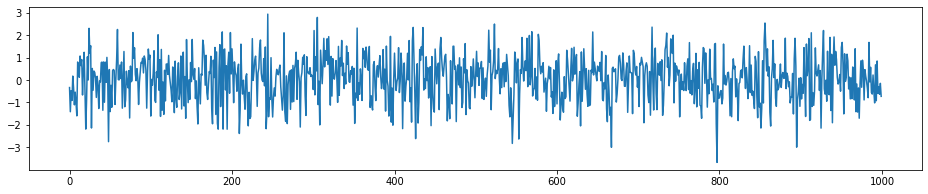

In [39]:
media = 0
std = 1
num_muestras = 1000
ruido_blanco = pd.Series(np.random.normal(media, std, num_muestras))

ruido_blanco.plot(figsize = (16,3))
#ruido_blanco.plot(figsize = (16,3), kind='kde')
plt.show()

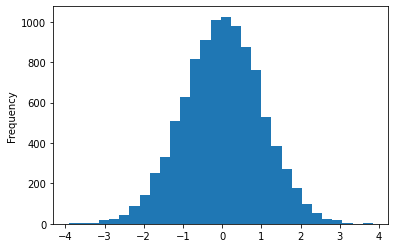

In [21]:
ruido_blanco.plot.hist(bins=30)



### otros ruidos blancos

####__Ejemplo 1 (Excercise 0.2.3 de la notas)__

1) Sea $X_t$ un proceso iid y $Y$ una variable aleatoria con distribución Bernoulli con $p = 0.05$

Entonces la variable aleatoria 

$Z_t= X_t~Y- X_t(Y-1)^2$ es un ruido blanco

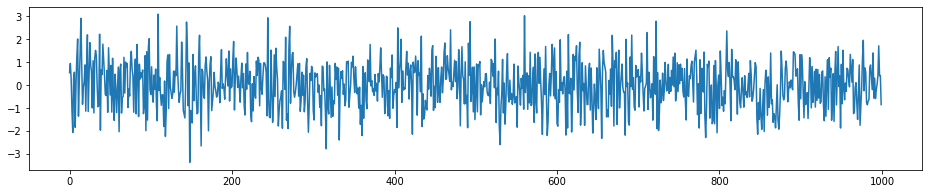

In [38]:
num_muestras = 1000
X_t = pd.Series(np.random.normal(size=num_muestras))
Y = pd.Series(np.random.binomial(1, p = 0.5, size =num_muestras))
Z_t = (X_t * Y) - X_t*pow((Y - 1),2)

Z_t.plot(figsize = (16,3))
# Z_t.plot(figsize = (16,3), kind='kde')
plt.show()

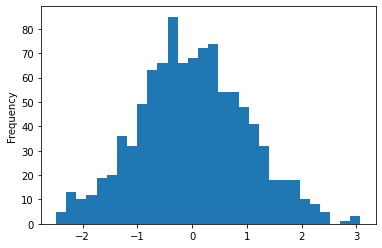

In [31]:
Z_t.plot.hist(bins=30)

####__Ejemplo 2 (Excercise 0.2.3 de la notas)__

2) Sea $X_t$ un proceso iid y el proceso estocástico definido por:

- $Z_t = X_t$ cuando t es par, y 
- $Z_t = \frac{1}{\sqrt{2}}(X^2_{t-1}-1)$ cuando t es impar,

es un ruido blanco

In [33]:
Xt = pd.Series(np.random.normal(size= 1000)) #proceso iid
Xt

0      0.612060
1     -0.063837
2     -1.540315
3      0.016662
4      0.930862
         ...   
995    0.501316
996    0.524216
997   -0.420301
998    0.471252
999   -0.303379
Length: 1000, dtype: float64

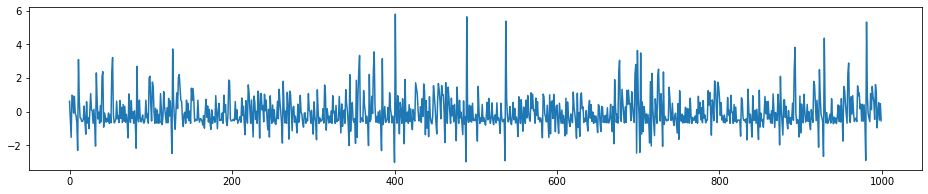

In [44]:
Zt = pd.Series(np.zeros(1000))
for i in range(len(Zt)):
  if i % 2 == 0:
    Zt[i]= Xt[i]
  else:
    Zt[i] = 1/np.sqrt(2)*(pow(Xt[i-1], 2)-1)

Zt.plot(figsize = (16,3))
# Zt.plot(figsize = (16,3), kind='kde')
plt.show()

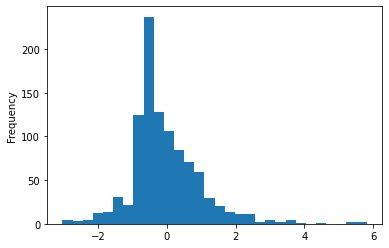

In [45]:
Zt.plot.hist(bins=30)

# Simulación de un proceso autorregresivo  (AR)

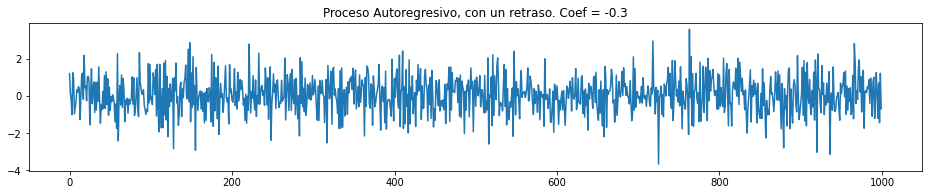

In [56]:
coef = -0.3
plt.subplot(2,1,1)
ar = np.array([1, - coef]) 
ma = np.array([1])

titulo = 'Proceso Autoregresivo, con un retraso. Coef = ' + str(coef)
AR_model = ArmaProcess(ar, ma)
AR_simulacion = pd.Series(AR_model.generate_sample(nsample=1000))
AR_simulacion.plot(figsize = (16,6), title=titulo)
plt.show()

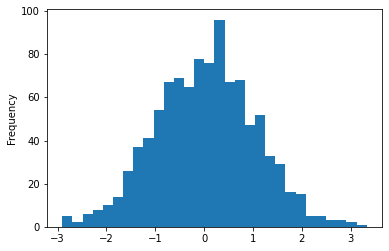

In [48]:
AR_simulacion.plot.hist(bins=30)

## Funciones de autocorrelación y autocorrelación parcial

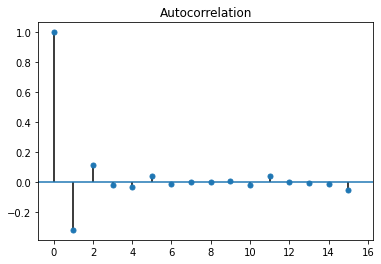

In [54]:
# Función de autocorrelación
plot_acf(AR_simulacion, alpha=1, lags=15)
plt.show()

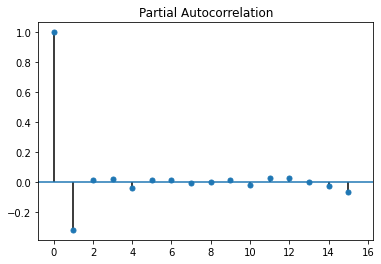

In [50]:
# Función de autocorrelación parcial

plot_pacf(AR_simulacion, alpha=1, lags=15)
plt.show()

# Simulación de serie de tiempo Medias Móviles (MA)

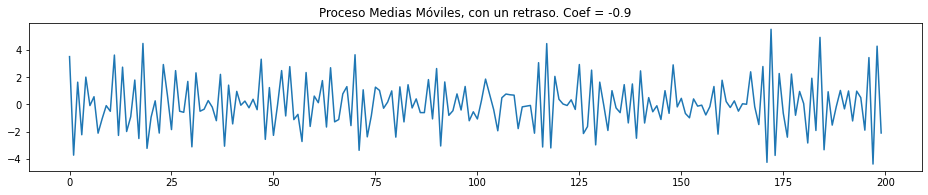

In [67]:
coef = -0.9
coef2 = 0.5
coef3 = -0.7
plt.subplot(2,1,1)
ar = np.array([1]) 
ma = np.array([1, coef, coef2, coef3])

titulo = 'Proceso Medias Móviles, con un retraso. Coef = ' + str(coef)
MA_model = ArmaProcess(ar, ma)
MA_simulacion = pd.Series(MA_model.generate_sample(nsample=200))
MA_simulacion.plot(figsize = (16,6), title=titulo)
plt.show()

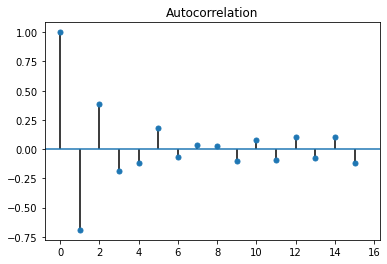

In [68]:
# Función de autocorrelación
plot_acf(MA_simulacion, alpha=1, lags=15)
plt.show()